In [7]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from main import *

In [8]:
models = {
    linear: 'results/linear_results.pkl'
    ,dtr: 'results/dtr_results.pkl'
    ,rfr: 'results/rfr_results.pkl'
    ,hgbr: 'results/hgbr_results.pkl'
    ,svr: 'results/svr_results.pkl'
    ,mlpr: 'results/mlpr_results.pkl'
    ,vor: 'results/vor_results.pkl'
    ,adaboost: 'results/adaboost_results.pkl'
    ,stacking: 'results/stacking_results.pkl'
    ,bagging_hgbr: 'results/bagging_hgbr_results.pkl'
    #,bagging_mlp: 'results/bagging_mlp_results.pkl'
}

loaded_results = {}
for model, filepath in models.items():
    with open(filepath, 'rb') as fp:
        results = pickle.load(fp)
        print('Read pickled dictionary')
        loaded_results[model.__name__] = results
print(loaded_results)
results = loaded_results

Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
Read pickled dictionary
{'linear': {1: {'r2': 0.48653135852019125, 'mae': 0.16048880355434733, 'mse': 0.04507879551034297, 'rmse': 0.2123176759253524, 'mdae': 0.12148007824013228}, 2: {'r2': 0.47017269128101913, 'mae': 0.16284464491023154, 'mse': 0.046514966983582554, 'rmse': 0.21567328759858637, 'mdae': 0.1211271399523772}, 3: {'r2': 0.4513866922553682, 'mae': 0.1659647299312082, 'mse': 0.04816424045448861, 'rmse': 0.21946352875703198, 'mdae': 0.12294930570527607}, 4: {'r2': 0.4398111203520788, 'mae': 0.17101076991626982, 'mse': 0.049180491100759435, 'rmse': 0.22176674931278456, 'mdae': 0.1315600718070057}, 5: {'r2': 0.45396262592196135, 'mae': 0.17056212998831954, 'mse': 0.04793809229737836, 'rmse': 0.2189476930624718, 'mdae': 0.14034211204601837}, 6: {'r2': 0.43374874699

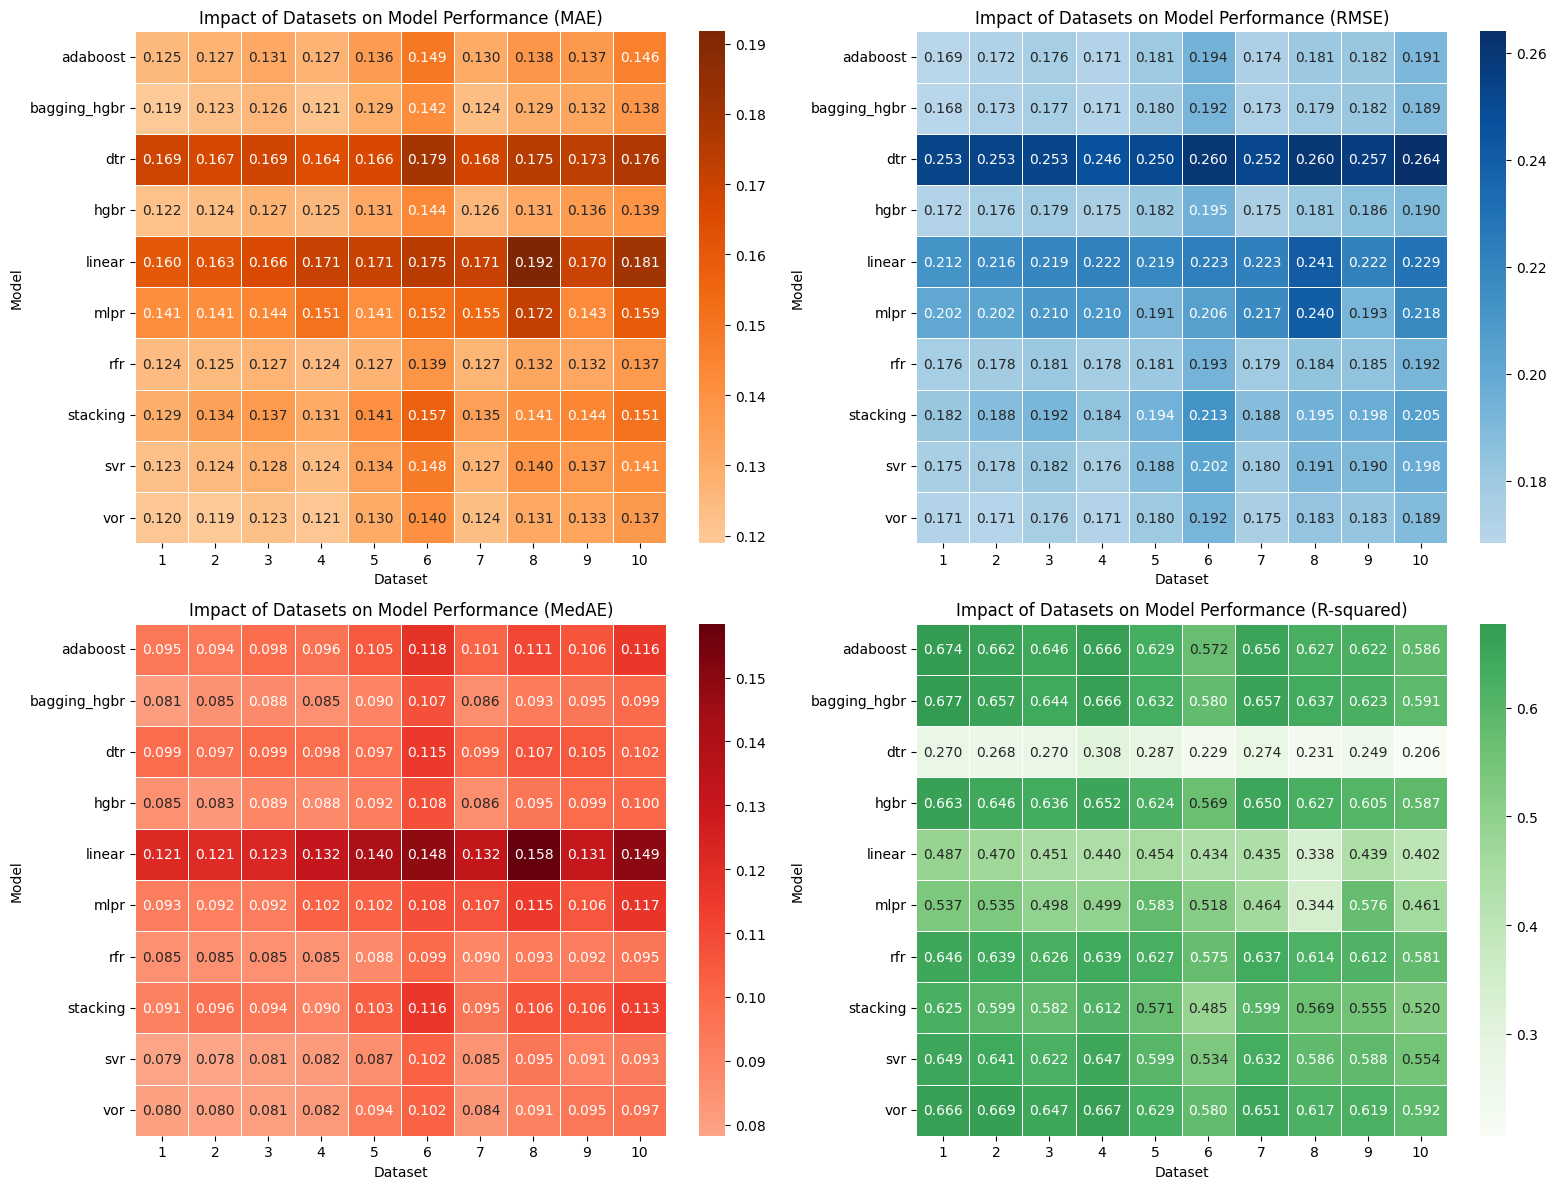

In [9]:
# Create a DataFrame to store the data
data_list = []
for model in results.keys():
    for dataset, metrics in results[model].items():
        data_list.append((model, dataset, metrics['mae'], metrics['rmse'], metrics['mdae'], metrics['r2']))

df_data = pd.DataFrame(data_list, columns=['Model', 'Dataset', 'MAE', 'RMSE', 'MedAE', 'R2'])

# Create the pivot tables for the heatmaps
df_data_pivot_mae = df_data.pivot(index='Model', columns='Dataset', values='MAE')
df_data_pivot_rmse = df_data.pivot(index='Model', columns='Dataset', values='RMSE')
df_data_pivot_medae = df_data.pivot(index='Model', columns='Dataset', values='MedAE')
df_data_pivot_r2 = df_data.pivot(index='Model', columns='Dataset', values='R2')

# Create the heatmaps with customized color maps
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.heatmap(df_data_pivot_mae, annot=True, fmt=".3f", cmap='Oranges', linewidths=0.5, center=df_data_pivot_mae.values.mean())
plt.title('Impact of Datasets on Model Performance (MAE)')
plt.xlabel('Dataset')
plt.ylabel('Model')

plt.subplot(2, 2, 2)
sns.heatmap(df_data_pivot_rmse, annot=True, fmt=".3f", cmap='Blues', linewidths=0.5, center=df_data_pivot_rmse.values.mean())
plt.title('Impact of Datasets on Model Performance (RMSE)')
plt.xlabel('Dataset')
plt.ylabel('Model')

plt.subplot(2, 2, 3)
sns.heatmap(df_data_pivot_medae, annot=True, fmt=".3f", cmap='Reds', linewidths=0.5, center=df_data_pivot_medae.values.mean())
plt.title('Impact of Datasets on Model Performance (MedAE)')
plt.xlabel('Dataset')
plt.ylabel('Model')

plt.subplot(2, 2, 4)
sns.heatmap(df_data_pivot_r2, annot=True, fmt=".3f", cmap='Greens', linewidths=0.5, center=df_data_pivot_r2.values.mean())
plt.title('Impact of Datasets on Model Performance (R-squared)')
plt.xlabel('Dataset')
plt.ylabel('Model')

plt.tight_layout()
plt.show()


These show the specific values for r^2, rmse, medae and mae over all models and datasets. Makes it easier to compare the performance of a given model/dataset combination with others. Note that for mae, higher values are less desirable so lighter values are better, darker values worse. On the other hand for r^2, higher values are more desirable so darker values are better, lighter values are worse.

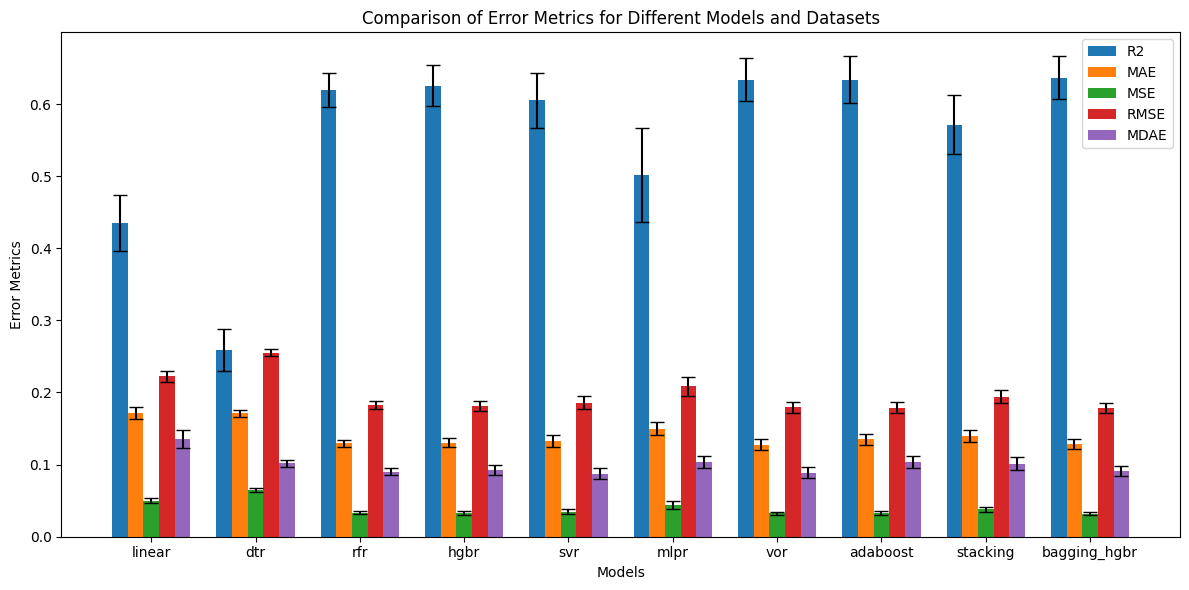

In [10]:
# Extract metrics for each model and dataset
models = list(results.keys())
datasets = list(results[models[0]].keys())
metrics = list(results[models[0]][datasets[0]].keys())

# Calculate means and standard errors
means = {}
stds = {}
for metric in metrics:
    means[metric] = np.zeros(len(models))
    stds[metric] = np.zeros(len(models))
    for i, model in enumerate(models):
        model_values = [results[model][dataset][metric] for dataset in datasets]
        means[metric][i] = np.mean(model_values)
        stds[metric][i] = np.std(model_values)

# Plotting the grouped bar chart with error bars for each metric
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index - 2 * bar_width + i * bar_width, means[metric], bar_width, yerr=stds[metric], capsize=5, label=metric.upper())

ax.set_xlabel('Models')
ax.set_ylabel('Error Metrics')
ax.set_title('Comparison of Error Metrics for Different Models and Datasets')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

Above figure shows the ranges of r^2, mae, medae, rmse for each model across all datasets. For example, the rfr appears to produce relatively consistent values for these metrics accross all datasets, as all of its error bars relatively are small. The mlpr has a much larger error bar for r^2 than rfr, so in this case the choice of training dataset has a greater impact on mlpr than on rfr.